In [233]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT 

%matplotlib inline

In [3]:
inFile = ROOT.TFile.Open("/home/jhonerma/ALICE_locAna_Output/pp_13TeV/sim/LHC17e5/000256417/LAOD/GammaCaloMergedML_1540.root", "READ")
tree = inFile.Get("00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Cluster")

In [5]:
tree.Show(0)

======> EVENT:0
 fClusterN       = 6
 fCol            = 15, 
                  14, 15, 14, 14, 15
 fRow            = 1, 
                  0, 0, 2, 1, 2
 fSupMod         = 0, 
                  0, 0, 0, 0, 0
 fTiming         = 6.15861e-07, 
                  6.1643e-07, 6.19219e-07, 6.28166e-07, 6.18154e-07, 6.16488e-07
 fEnergy         = 8.6707, 
                  0.20933, 0.502596, 0.100121, 1.17679, 0.26096


In [85]:
nentries = tree.GetEntries()
print(nentries)

287


In [75]:
ClusterN = np.zeros((nentries), dtype=int)
_clusterN = np.zeros((1), dtype=int)
tree.SetBranchAddress("fClusterN", _clusterN)

for i in range(nentries):
    tree.GetEntry(i)
    ClusterN[i] = _clusterN
    
maxClusN = int(np.max(ClusterN))

In [76]:
print(maxClusN)

15


In [92]:
Col = np.zeros((nentries, maxClusN), dtype=np.ubyte)
Row = np.zeros((nentries, maxClusN), dtype=np.ubyte)
SupMod = np.zeros((nentries, maxClusN), dtype=np.ubyte)
Timing = np.zeros((nentries, maxClusN))
Energy = np.zeros((nentries, maxClusN))

_col = np.zeros((maxClusN), dtype=np.ubyte)
_row = np.zeros((maxClusN), dtype=np.ubyte)
_supmod = np.zeros((maxClusN), dtype=np.ubyte)
_timing = np.zeros((maxClusN), dtype=np.float32)
_energy = np.zeros((maxClusN), dtype=np.float32)

tree.SetBranchAddress("fCol", _col)
tree.SetBranchAddress("fRow", _row)
tree.SetBranchAddress("fSupMod", _supmod)
tree.SetBranchAddress("fTiming", _timing)
tree.SetBranchAddress("fEnergy", _energy)


for i in range(0,nentries):
    tree.GetEntry(i)
    Col[i,:ClusterN[i]] = _col[:ClusterN[i]]
    Row[i,:ClusterN[i]] = _row[:ClusterN[i]]
    SupMod[i,:ClusterN[i]] = _supmod[:ClusterN[i]]
    Timing[i,:ClusterN[i]] = _timing[:ClusterN[i]]
    Energy[i,:ClusterN[i]] = _energy[:ClusterN[i]]

In [115]:
SupMod[145]

array([11, 11, 11, 10, 11, 11, 11,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=uint8)

In [113]:
Col[145]

array([ 0,  1,  0, 47,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=uint8)

In [114]:
Row[145]

array([3, 2, 2, 3, 4, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [96]:
for i in range(nentries):
    print(i, SupMod[i, 0:(ClusterN[i])])

0 [0 0 0 0 0 0]
1 [8 8 8 8]
2 [15 15 15 15]
3 [2 2 2 2 2 2]
4 [5 5 5]
5 [10 10 10 10 10 10 10 10 10]
6 [16 16]
7 [13 13 13 13 13]
8 [9 9 9 9 9 9 9]
9 [17 17 17 17]
10 [3 3 3 3 3]
11 [5 5 5 5 5 5 5]
12 [8 8 8 8 8]
13 [3 3 3 3 3]
14 [15 15 15 15 15]
15 [4 4 4 4 4 4 4 4 4 4]
16 [8 8 8 8 8 8 8 8]
17 [14 14 14 14 14]
18 [6 6 6 6]
19 [17 17 17 17 17 17]
20 [5 5 5 5 5 5 5 5 5 5]
21 [11 11 11 11 11 11 11 11 11 11]
22 [9 9]
23 [13 13 13]
24 [1 1 1 1 1 1]
25 [2 2 2 2 2]
26 [3 3 3 3 3 3 3 3]
27 [7 7 7 7 7 7]
28 [12 12 12 12]
29 [14 14 14 14 14 14 14 14]
30 [4 4 4 4 4 4]
31 [9 9]
32 [4 4 4 4 4]
33 [15 15 15 15 15]
34 [2 2 2 2]
35 [2 2 2 2 2 2 2]
36 [8 8 8 8]
37 [4 4 4 4]
38 [4 4 4]
39 [0 0 0 0]
40 [4 4 4 4]
41 [8 8 8 8]
42 [16 16 16 16 16]
43 [0 0 0 0 0]
44 [12 12 12 12]
45 [0 0 0 0 0 0 0]
46 [13 13 13]
47 [6 6 6 6 6 6]
48 [1 1 1]
49 [9 9 9 9 9 9 9]
50 [1 1 1 1 1 1]
51 [12 12 12 12 12 12 12]
52 [9 9 9 9 9 9]
53 [8 8 8 8 8 8 8 8 8 8 9 8 8]
54 [8 8 8 9 8 8 8 8 8 8 8 8]
55 [2 2 2]
56 [10 10 10 10 10 

In [226]:
def reconstruct_cluster(ncell, supmod, row, col, data):
    if( np.all(supmod[:ncell] == supmod[0]) ):
        
        arrsize = 10
        arr = np.zeros((arrsize,arrsize))
        
        col_min = np.min(col[:ncell])
        row_min = np.min(row[:ncell])
        width = np.max(col) - col_min
        height = np.max(row) - row_min
        offset_h = int((arrsize-height)/2)
        offset_w = int((arrsize-width)/2)
        
        
        for i in range(ncell):
            arr[ row[i] - row_min + offset_h, col[i] - col_min + offset_w ] = data[i]
   
        return arr

In [291]:
def plot_cluster(ncell, supmod, row, col, data):
    #Number of plots
    Num = 16
    
    #Convert them from an unsigned datatype to signed
    supmod = supmod.astype(int)
    row = row.astype(int)
    col = col.astype(int)

    #Create Num random numbers
    rand = np.random.randint(0,nentries, size=Num)
    arrs = []
        
    for i in range(Num):
        arr = reconstruct_cluster(ncell[i], supmod[i], row[i], col[i], data[i])
        arrs.append(arr)
        
    #Plots
    pCols = 4
    pRows = int(np.ceil(Num/pCols))
    
    max_d = np.max(data[rand])
    
    fig, axs = plt.subplots(pRows, pCols, figsize=(12,12), subplot_kw={'xticks': [], 'yticks': []}, constrained_layout=True)
    
    for i, ax in enumerate(axs.flat):
        im = ax.imshow(arrs[i], cmap='viridis', vmin=0, vmax=max_d)
   
    fig.colorbar(im, ax=axs.ravel().tolist())
    plt.show()
    

In [328]:
def scaleto01(data, ncell):
    for i in range(data.shape[0]):
        if i == 0:
            _min = np.min(data[i,:ncell[i]])
        else:
            _tmp = np.min(data[i,:ncell[i]])
            
    
        
    
    _max = np.max(data)
    _dif = _max - _min
    data = (data - _min) / _dif
    return data

In [326]:
def plot_comp(ncell, supmod, row, col, timing, energy):
    #Number of plots
    Num = 8
    
    timing = scaleto01(timing, ncell)
    energy = scaleto01(energy, ncell)
    
    #Convert them from an unsigned datatype to signed
    supmod = supmod.astype(int)
    row = row.astype(int)
    col = col.astype(int)

    #Create Num random numbers
    rand = np.random.randint(0,nentries, size=Num)
    arr_e = []
    arr_t = []
        
    for i in range(Num):
        arr = reconstruct_cluster(ncell[i], supmod[i], row[i], col[i], energy[i])
        arr_e.append(arr)
        arr = reconstruct_cluster(ncell[i], supmod[i], row[i], col[i], timing[i])
        arr_t.append(arr)
        
    #Plots
    pCols = 4
    pRows = int(np.ceil(2*Num/pCols))
    
    
    max_e = np.max(energy[rand])
    max_t = np.max(timing[rand])
    
    fig, axs = plt.subplots(pRows, pCols, figsize=(12,12), subplot_kw={'xticks': [], 'yticks': []}, constrained_layout=True)
    
    for i in range(pRows):
        for j in range(pCols):
            ax = axs[i,j]
            if(np.mod(i,2) == 1):
                im = ax.imshow(arr_t[j+(i-1)*2], cmap='viridis', vmin=0, vmax=max_t)
            else:
                im = ax.imshow(arr_e[j+i*2], cmap='viridis', vmin=0, vmax=max_e)
   
    #fig.colorbar(im, ax=axs.ravel().tolist())
    plt.show()

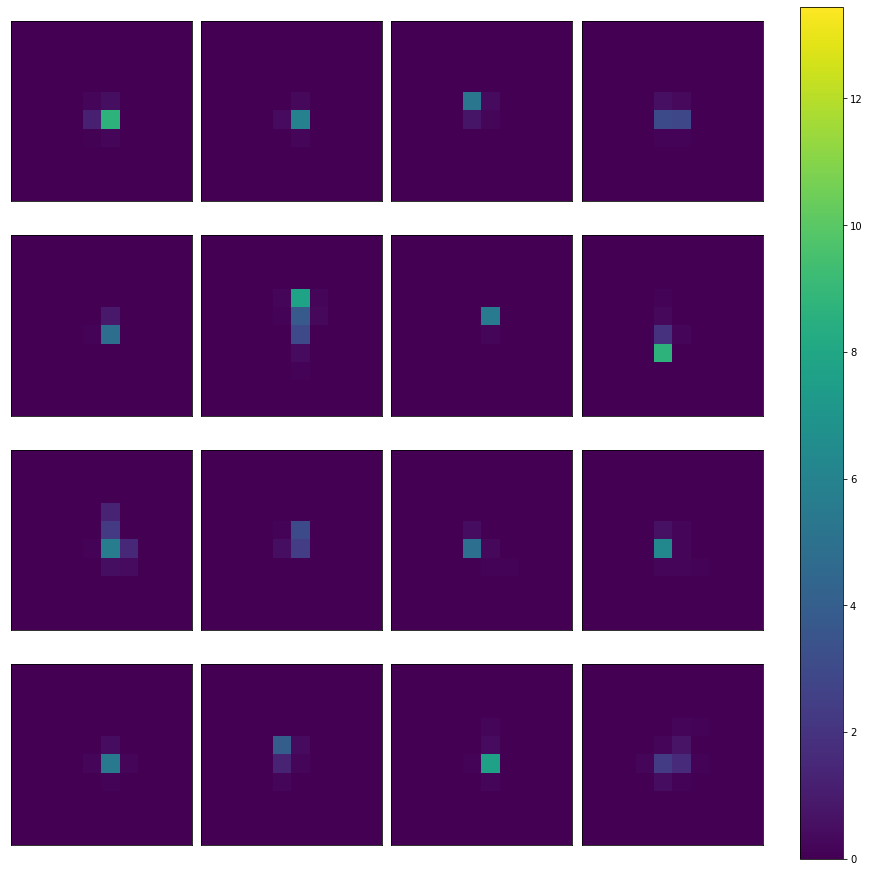

In [323]:
plot_cluster(ClusterN, SupMod, Row, Col, Energy)

In [329]:
plot_comp(ClusterN, SupMod, Row, Col, Timing, Energy)

/home/jhonerma/anaconda3/envs/root-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5.74302305e-07, 5.83641247e-07, 5.92980189e-07, 6.02319130e-07,
        6.11658072e-07, 6.20997014e-07, 6.30335956e-07, 6.39674897e-07,
        6.49013839e-07, 6.58352781e-07, 6.67691722e-07]),
 <a list of 287 BarContainer objects>)

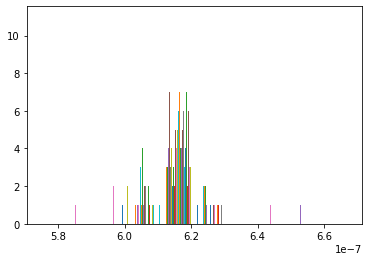

In [321]:
_list = []
for i in range(nentries):
    _list.append(Timing[i,:ClusterN[i]])
    
plt.hist(_list)

array([[6.15860813e-07, 6.16430214e-07, 6.19218895e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.16019577e-07, 6.09264646e-07, 6.19870605e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.16158957e-07, 6.14906298e-07, 6.15436136e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.17875912e-07, 6.18850265e-07, 6.17065041e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.16835166e-07, 6.29624481e-07, 6.26992346e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.15350189e-07, 6.06512344e-07, 6.14389307e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])